In [2]:
import os
import pandas as pd

In [1]:
import numpy as np
org_dic = np.load('/home/yslee/CNN_Prediction_Endo/dataset/org_dic.npy',allow_pickle='TRUE').item()

In [2]:
org_dic

{'Vd-71': <PIL.Image.Image image mode=L size=341x571 at 0x7FA7E8588210>,
 'Vd-32': <PIL.Image.Image image mode=L size=375x657 at 0x7FA7E85A16D0>,
 'PM-102': <PIL.Image.Image image mode=L size=532x1296 at 0x7FA7E8549390>,
 'IH-246': <PIL.Image.Image image mode=L size=217x628 at 0x7FA7E854EE10>,
 'IH-91': <PIL.Image.Image image mode=L size=378x602 at 0x7FA7E85661D0>,
 'EH-4': <PIL.Image.Image image mode=L size=279x597 at 0x7FA7E8566F90>,
 'Vd-60': <PIL.Image.Image image mode=L size=415x634 at 0x7FA7E856D510>,
 'IH-112': <PIL.Image.Image image mode=L size=300x631 at 0x7FA7E8572D90>,
 'PM-156': <PIL.Image.Image image mode=L size=414x645 at 0x7FA7E8576ED0>,
 'IH-240': <PIL.Image.Image image mode=L size=686x1402 at 0x7FA7E8576F90>,
 'Vd-11': <PIL.Image.Image image mode=L size=431x548 at 0x7FA7E830A090>,
 'IH-263': <PIL.Image.Image image mode=L size=393x641 at 0x7FA7E830A150>,
 'IH-209': <PIL.Image.Image image mode=L size=305x637 at 0x7FA7E830A210>,
 'PM-89': <PIL.Image.Image image mode=L siz

In [31]:
label_file=pd.read_csv('./dataset/premolar_label.csv',sep=',',header=0,encoding = "CP949")
label_file.columns=['PatientID','PatientID_new','Tooth','Result']
#label_file=label_file.set_index('PatientID')

In [32]:
for i in range(0,len(label_file['PatientID'])):
    label_file['PatientID'][i]=label_file['PatientID'][i].replace('_','-')
    if label_file['PatientID'][i].split('-')[1].startswith('00'):
        label_file['PatientID'][i]=label_file['PatientID'][i].replace('0','',2)
    elif label_file['PatientID'][i].split('-')[1].startswith('0'):
        label_file['PatientID'][i]=label_file['PatientID'][i].replace('0','',1)

/home/yslee/tmp/conda/envs/cuda_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/yslee/tmp/conda/envs/cuda_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/yslee/tmp/conda/envs/cuda_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [101]:
for i in range(0,len(label_file['PatientID'])):
    label_file['PatientID_new'][i]='PM-'+str(i+1)

/home/yslee/tmp/conda/envs/cuda_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/yslee/tmp/conda/envs/cuda_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [102]:
import numpy as np
for i in range(0,len(label_file['Result'])):
    if label_file['Result'][i]=='FAIL' or label_file['Result'][i]=='Fail':
        label_file['Result'][i]=1
    elif label_file['Result'][i]=='SUCCESS' or label_file['Result'][i]=='Success':
        label_file['Result'][i]=0
    else:
        label_file['Result'][i]=np.nan

/home/yslee/tmp/conda/envs/cuda_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/yslee/tmp/conda/envs/cuda_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/yslee/tmp/conda/envs/cuda_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [104]:
pm_file_list=[os.path.splitext(file)[0].split('_')[0] for file in os.listdir('./dataset/pm+vd/preprocessed_pm')]
vd_file_list=[os.path.splitext(file)[0].split('_')[0] for file in os.listdir('./dataset/pm+vd/preprocessed_vd')]
eh_file_list=[os.path.splitext(file)[0].split('_')[0] for file in os.listdir('./dataset/eh_1-162/preprocessed')]
ih_file_list=[os.path.splitext(file)[0].split('_')[0] for file in os.listdir('./dataset/ih_1-295/preprocessed')]

In [111]:
label_file['Status']=''
for i in range(0,len(label_file['PatientID'])):
    if label_file['PatientID'][i].startswith('PM'):
        if label_file['PatientID'][i] in pm_file_list:
            label_file['Status'][i]=1
        else:
            label_file['Status'][i]=0
    elif label_file['PatientID'][i].startswith('Vd'):
        if label_file['PatientID'][i] in vd_file_list:
            label_file['Status'][i]=1
        else:
            label_file['Status'][i]=0
    elif label_file['PatientID'][i].startswith('EH'):
        if label_file['PatientID'][i] in eh_file_list:
            label_file['Status'][i]=1
        else:
            label_file['Status'][i]=0
    elif label_file['PatientID'][i].startswith('IH'):
        if label_file['PatientID'][i] in ih_file_list:
            label_file['Status'][i]=1
        else:
            label_file['Status'][i]=0
    else:
        print(label_file['PatientID'][i])

/home/yslee/tmp/conda/envs/cuda_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/yslee/tmp/conda/envs/cuda_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/yslee/tmp/conda/envs/cuda_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD f

In [112]:
label_file

,PatientID,PatientID_new,Tooth,Result,Status
0,PM-1,PM-1,45,1,1
1,PM-2,PM-2,44,1,1
2,PM-3,PM-3,35,1,1
3,PM-4,PM-4,45,1,1
4,PM-6,PM-5,34,1,1
...,...,...,...,...,...
677,EH-158,PM-678,24,1,1
678,EH-159,PM-679,35,1,1
679,EH-160,PM-680,35,1,1
680,EH-161,PM-681,35,0,1


In [114]:
#label_file.to_csv('./dataset/premolar_label_new.csv',index=False)

In [3]:
pm_df=pd.read_csv('./dataset/premolar_label_new.csv',sep=',',header=0,encoding = "CP949")

In [4]:
pm1=0
pm2=0
pm1_list=[]
success=0
fail=0
for i in range(0,len(pm_df)):
    if pm_df['Status'][i]==1:
        if pm_df['Tooth'][i]==14 or pm_df['Tooth'][i]==24:
            pm2+=1
        else:
            pm1+=1
            pm1_list.append(pm_df['PatientID'][i])
        
        if pm_df['Result'][i]==1:
            fail+=1
        elif pm_df['Result'][i]==0:
            success+=1

In [5]:
file_list=[]
for i in range(0,len(pm_df)):
    if pm_df['Status'][i]==1:
        file_list.append(pm_df['PatientID'][i])

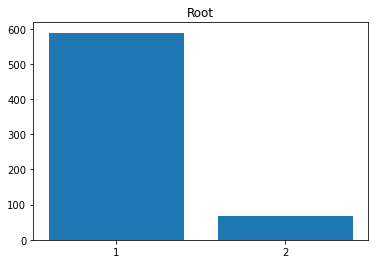

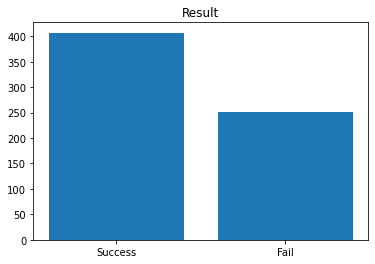

In [6]:
import matplotlib.pyplot as plt
plt.title('Root')
plt.bar(['1','2'],[pm1,pm2])
plt.show()
plt.title('Result')
plt.bar(['Success','Fail'],[success,fail])
plt.show()

## Split Dataset

In [12]:
pm_path='/home/yslee/CNN_Prediction_Endo/dataset/pm+vd/preprocessed_pm'
vd_path='/home/yslee/CNN_Prediction_Endo/dataset/pm+vd/preprocessed_vd'
eh_path='/home/yslee/CNN_Prediction_Endo/dataset/eh_1-162/preprocessed'
ih_path='/home/yslee/CNN_Prediction_Endo/dataset/ih_1-295/preprocessed'
split_path='/home/yslee/CNN_Prediction_Endo/dataset/p_1-182_split'

if not os.path.isdir(split_path):
    os.mkdir(split_path)
if not os.path.isdir(os.path.join(split_path,'train')):
    os.mkdir(os.path.join(split_path,'train'))
if not os.path.isdir(os.path.join(split_path,'val')):
    os.mkdir(os.path.join(split_path,'val'))
if not os.path.isdir(os.path.join(split_path,'test')):
    os.mkdir(os.path.join(split_path,'test'))
    
train_path=os.path.join(split_path,'train')
test_path=os.path.join(split_path,'test')
val_path=os.path.join(split_path,'val')

In [8]:
label_file=pd.read_csv('./dataset/premolar_label_new.csv',sep=',',header=0,encoding = "CP949")
label_file=label_file.set_index('PatientID')

success=[]
fail=[]
for file in pm1_list:
    patID=file
    
    try:
        if int(label_file.loc[file]['Result'])==1:
            fail.append(file+'_1.bmp')
        else:
            success.append(file+'_1.bmp')
    except KeyError:
        print('No label file : ',file)
        
print('Total number of Success: ',len(success))
print('Total number of Fail: ',len(fail))

Total number of Success:  400
Total number of Fail:  189


In [9]:
print('<Success>')
suc_test=80
suc_train=round((len(success)-suc_test)*0.8)
suc_val=len(success)-suc_test-suc_train
print("The number of test data : ",suc_test)
print("The number of training data : ",suc_train)
print("The number of val data : ",suc_val)

fail_test=20
fail_train=round((len(fail)-fail_test)*0.8)
fail_val=len(fail)-fail_test-fail_train
print('<Fail>')
print("The number of test data : ",fail_test)
print("The number of training data : ",fail_train)
print("The number of val data : ",fail_val)

<Success>
The number of test data :  80
The number of training data :  256
The number of val data :  64
<Fail>
The number of test data :  20
The number of training data :  135
The number of val data :  34


In [94]:
import random
import shutil

random.shuffle(success)
random.shuffle(fail)

'''for i in range(0,len(success)):
    if success[i].startswith('PM'):
        if i<suc_train:
            shutil.copy(os.path.join(pm_path,success[i]),train_path)
        elif i<suc_train+suc_val:
            shutil.copy(os.path.join(pm_path,success[i]),val_path)
        elif i<suc_train+suc_val+suc_test :
            shutil.copy(os.path.join(pm_path,success[i]),test_path)
    elif success[i].startswith('Vd'):
        if i<suc_train:
            shutil.copy(os.path.join(vd_path,success[i]),train_path)
        elif i<suc_train+suc_val:
            shutil.copy(os.path.join(vd_path,success[i]),val_path)
        elif i<suc_train+suc_val+suc_test :
            shutil.copy(os.path.join(vd_path,success[i]),test_path)
    elif success[i].startswith('EH'):
        if i<suc_train:
            shutil.copy(os.path.join(eh_path,success[i]),train_path)
        elif i<suc_train+suc_val:
            shutil.copy(os.path.join(eh_path,success[i]),val_path)
        elif i<suc_train+suc_val+suc_test :
            shutil.copy(os.path.join(eh_path,success[i]),test_path)
    elif success[i].startswith('IH'):
        if i<suc_train:
            shutil.copy(os.path.join(ih_path,success[i]),train_path)
        elif i<suc_train+suc_val:
            shutil.copy(os.path.join(ih_path,success[i]),val_path)
        elif i<suc_train+suc_val+suc_test :
            shutil.copy(os.path.join(ih_path,success[i]),test_path)'''
            
for i in range(0,len(fail)):
    if fail[i].startswith('PM'):
        if i<fail_train:
            shutil.copy(os.path.join(pm_path,fail[i]),train_path)
        elif i<fail_train+fail_val:
            shutil.copy(os.path.join(pm_path,fail[i]),val_path)
        else :
            shutil.copy(os.path.join(pm_path,fail[i]),test_path)
    elif fail[i].startswith('Vd'):
        if i<fail_train:
            shutil.copy(os.path.join(vd_path,fail[i]),train_path)
        elif i<fail_train+fail_val:
            shutil.copy(os.path.join(vd_path,fail[i]),val_path)
        else :
            shutil.copy(os.path.join(vd_path,fail[i]),test_path)
    elif fail[i].startswith('EH'):
        if i<fail_train:
            shutil.copy(os.path.join(eh_path,fail[i]),train_path)
        elif i<fail_train+fail_val:
            shutil.copy(os.path.join(eh_path,fail[i]),val_path)
        else :
            shutil.copy(os.path.join(eh_path,fail[i]),test_path)
    elif fail[i].startswith('IH'):
        if i<fail_train:
            shutil.copy(os.path.join(ih_path,fail[i]),train_path)
        elif i<fail_train+fail_val:
            shutil.copy(os.path.join(ih_path,fail[i]),val_path)
        else :
            shutil.copy(os.path.join(ih_path,fail[i]),test_path)

## Visualize Dataset

In [3]:
import os
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from training_modules import train_model,test_model
from dental_datasets import DentalDataset,get_pm_label
from torch import optim
from torch.optim import lr_scheduler
from datetime import datetime
import pandas as pd
from Attention_ResNet import AttentionResNet18,AttentionResNet18_2,AttentionResNet18_3,DenseAttentionResNet18,ResNet18
import matplotlib.pyplot as plt
import numpy as np

In [5]:
##Path##
split_path='/home/NAS_mount/yslee/dataset/augmented_split2'
train_path=os.path.join(split_path,'train')
val_path=os.path.join(split_path,'val')
test_path=os.path.join(split_path,'test')

##Define dataset, dataloaders##
org_dic = np.load('/home/NAS_mount/yslee/dataset/org_dic_0817.npy',allow_pickle='TRUE').item()

label_file=pd.read_csv('/home/NAS_mount/yslee/dataset/premolar_labels_0810.csv')
label_file=label_file.set_index('PatientID_new')
label_file=label_file['Result']

preprocessed_mean=0.59
preprocessed_std=0.25
org_mean=0.69
org_std=0.20

'''preprocessed_mean=0.61
preprocessed_std=0.25
org_mean=0.69
org_std=0.20'''


data_normalization={'preprocessed': transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((preprocessed_mean,), (preprocessed_std,))
]),
    'original': transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((org_mean,), (org_std,))
])          
}
dataset={'train': DentalDataset(preprocessed_dir=train_path,org_dic=org_dic,label_file=label_file,normalize=data_normalization,augmentation=True),
            'val': DentalDataset(preprocessed_dir=val_path,org_dic=org_dic,label_file=label_file,normalize=data_normalization,augmentation=False),
            'test': DentalDataset(preprocessed_dir=test_path,org_dic=org_dic,label_file=label_file,normalize=data_normalization,augmentation=False)}

dataloaders={'train': torch.utils.data.DataLoader(dataset['train'],batch_size=30,shuffle=True),
                'val':torch.utils.data.DataLoader(dataset['val'],batch_size=30,shuffle=True),
                'test':torch.utils.data.DataLoader(dataset['test'],batch_size=30,shuffle=False)}

## Original Dataset Dictionary

In [19]:
import pydicom

In [23]:
split_path='/home/yslee/CNN_Prediction_Endo/dataset/pm_1-682_exp1424_split'
train_path=os.path.join(split_path,'train')
val_path=os.path.join(split_path,'val')
test_path=os.path.join(split_path,'test')

In [32]:
pm_path='/home/yslee/CNN_Prediction_Endo/dataset/pm+vd/crop'
vd_path='/home/yslee/CNN_Prediction_Endo/dataset/pm+vd/crop'
eh_path='/home/yslee/CNN_Prediction_Endo/dataset/eh_1-162/crop'
ih_path='/home/yslee/CNN_Prediction_Endo/dataset/ih_1-295/crop'

org_dic={}
for file in os.listdir(train_path):
    file_name,ext=os.path.splitext(file)
    if file.startswith('PM'):
        dcm=pydicom.read_file(os.path.join(pm_path,file_name+'.dcm'))
        org_dic[file_name.split('_')[0]]=dcm.pixel_array
    elif file.startswith('Vd'):
        dcm=pydicom.read_file(os.path.join(vd_path,file_name+'.dcm'))
        org_dic[file_name.split('_')[0]]=dcm.pixel_array
    elif file.startswith('EH'):
        dcm=pydicom.read_file(os.path.join(eh_path,file_name+'.dcm'))
        org_dic[file_name.split('_')[0]]=dcm.pixel_array
    elif file.startswith('IH'):
        dcm=pydicom.read_file(os.path.join(ih_path,file_name+'.dcm'))
        org_dic[file_name.split('_')[0]]=dcm.pixel_array
    else:
        print(file_name)
        
for file in os.listdir(val_path):
    file_name,ext=os.path.splitext(file)
    if file.startswith('PM'):
        dcm=pydicom.read_file(os.path.join(pm_path,file_name+'.dcm'))
        org_dic[file_name.split('_')[0]]=dcm.pixel_array
    elif file.startswith('Vd'):
        dcm=pydicom.read_file(os.path.join(vd_path,file_name+'.dcm'))
        org_dic[file_name.split('_')[0]]=dcm.pixel_array
    elif file.startswith('EH'):
        dcm=pydicom.read_file(os.path.join(eh_path,file_name+'.dcm'))
        org_dic[file_name.split('_')[0]]=dcm.pixel_array
    elif file.startswith('IH'):
        dcm=pydicom.read_file(os.path.join(ih_path,file_name+'.dcm'))
        org_dic[file_name.split('_')[0]]=dcm.pixel_array
    else:
        print(file_name)
        
for file in os.listdir(test_path):
    file_name,ext=os.path.splitext(file)
    if file.startswith('PM'):
        dcm=pydicom.read_file(os.path.join(pm_path,file_name+'.dcm'))
        org_dic[file_name.split('_')[0]]=dcm.pixel_array
    elif file.startswith('Vd'):
        dcm=pydicom.read_file(os.path.join(vd_path,file_name+'.dcm'))
        org_dic[file_name.split('_')[0]]=dcm.pixel_array
    elif file.startswith('EH'):
        dcm=pydicom.read_file(os.path.join(eh_path,file_name+'.dcm'))
        org_dic[file_name.split('_')[0]]=dcm.pixel_array
    elif file.startswith('IH'):
        dcm=pydicom.read_file(os.path.join(ih_path,file_name+'.dcm'))
        org_dic[file_name.split('_')[0]]=dcm.pixel_array
    else:
        print(file_name)

In [40]:
for patID in org_dic.keys():
    dcm=org_dic[patID]
    maxm=dcm.max()
    minm=dcm.min()
    for i in range(0,len(dcm)):
        for j in range(0,len(dcm[i])):
            dcm[i][j]=((dcm[i][j]-minm)/(maxm-minm))*255

In [56]:
from PIL import Image

for patID in org_dic_loaded.keys():
    org_dic[patID]=Image.fromarray(np.uint8(org_dic[patID]))

In [ ]:
import numpy as np
np.save('./dataset/org_dic.npy', org_dic) 

In [8]:
org_dic_loaded = np.load('./dataset/org_dic.npy',allow_pickle='TRUE').item()

In [11]:
img_list=np.array([])
for patID in org_dic_loaded.keys():
    tmp_img=org_dic_loaded[patID]
    tensor_transformer=transforms.ToTensor()
    tmp_img=tensor_transformer(tmp_img)
    img_list=np.append(img_list,tmp_img)

In [12]:
print('mean : ',np.mean(img_list))
print('std : ',np.std(img_list))

mean :  0.6977713983891654
std :  0.20400446406065137


## Organizing

In [11]:
label_file=pd.read_csv('./dataset/premolar_labels_0727.csv',sep=',')

In [22]:
label_file=label_file.set_index('PatientID')

In [36]:
pre_path='./dataset/preprocessed'
pm_path='/home/yslee/CNN_Prediction_Endo/dataset/pm+vd/preprocessed_pm'
vd_path='/home/yslee/CNN_Prediction_Endo/dataset/pm+vd/preprocessed_vd'
eh_path='/home/yslee/CNN_Prediction_Endo/dataset/eh_1-162/preprocessed'
ih_path='/home/yslee/CNN_Prediction_Endo/dataset/ih_1-295/preprocessed'

In [38]:
import shutil
for file in os.listdir(pm_path):
    file_name,ext=os.path.splitext(file)
    patID=file_name.split('_')[0]
    try:
        patID_new=label_file['PatientID_new'][patID]
    except KeyError:
        print(patID)
        continue
    shutil.copy(os.path.join(pm_path,file),os.path.join(pre_path,patID_new+'.bmp'))

PM-171
PM-169
PM-168


In [39]:
for file in os.listdir(vd_path):
    file_name,ext=os.path.splitext(file)
    patID=file_name.split('_')[0]
    try:
        patID_new=label_file['PatientID_new'][patID]
    except KeyError:
        print(patID)
        continue
    shutil.copy(os.path.join(vd_path,file),os.path.join(pre_path,patID_new+'.bmp'))

Vd-67
Vd-55


In [40]:
for file in os.listdir(eh_path):
    file_name,ext=os.path.splitext(file)
    patID=file_name.split('_')[0]
    try:
        patID_new=label_file['PatientID_new'][patID]
    except KeyError:
        print(patID)
        continue
    shutil.copy(os.path.join(eh_path,file),os.path.join(pre_path,patID_new+'.bmp'))

EH-118
EH-144
EH-85
EH-120
EH-136
EH-148
EH-137
EH-93
EH-127
EH-139
EH-75
EH-134
EH-113
EH-72
EH-79
EH-147
EH-68
EH-76
EH-74
EH-91
EH-83
EH-114
EH-99
EH-108
EH-90


In [41]:
for file in os.listdir(ih_path):
    file_name,ext=os.path.splitext(file)
    patID=file_name.split('_')[0]
    try:
        patID_new=label_file['PatientID_new'][patID]
    except KeyError:
        print(patID)
        continue
    shutil.copy(os.path.join(ih_path,file),os.path.join(pre_path,patID_new+'.bmp'))

In [25]:
label_file=pd.read_csv('./dataset/premolar_labels_0727.csv',sep=',')

In [23]:
label_file=label_file.set_index('PatientID')

In [27]:
label_file['Tooth'][0]

45

In [9]:
tooth_list=list(label_file['Tooth'].values)

In [10]:
set(tooth_list)

{14, 15, 24, 25, 34, 35, 44, 45}

In [28]:
tooth_class=[]
for i in range(0,len(label_file)):
    if label_file['Tooth'][i]==14 or label_file['Tooth'][i]==24:
        tooth_class.append(3)
    elif label_file['Tooth'][i]==15 or label_file['Tooth'][i]==25:
        tooth_class.append(0)
    elif label_file['Tooth'][i]==34 or label_file['Tooth'][i]==44:
        tooth_class.append(1)
    elif label_file['Tooth'][i]==35 or label_file['Tooth'][i]==45:
        tooth_class.append(2)

In [29]:
label_file['tooth_class']=tooth_class

In [31]:
label_file

,PatientID,PatientID_new,Tooth,Result,Status,tooth_class
0,PM-1,P-1,45,1.0,1,2
1,PM-2,P-2,44,1.0,1,1
2,PM-3,P-3,35,1.0,1,2
3,PM-4,P-4,45,1.0,1,2
4,PM-6,P-5,34,1.0,1,1
...,...,...,...,...,...,...
677,EH-158,P-678,24,1.0,1,3
678,EH-159,P-679,35,1.0,1,2
679,EH-160,P-680,35,1.0,1,2
680,EH-161,P-681,35,0.0,1,2


In [34]:
label_file.to_csv('/home/NAS_mount/yslee/dataset/premolar_labels_0810.csv',index=False)

In [35]:
pd.read_csv('/home/NAS_mount/yslee/dataset/premolar_labels_0810.csv')

,PatientID,PatientID_new,Tooth,Result,Status,tooth_class
0,PM-1,P-1,45,1.0,1,2
1,PM-2,P-2,44,1.0,1,1
2,PM-3,P-3,35,1.0,1,2
3,PM-4,P-4,45,1.0,1,2
4,PM-6,P-5,34,1.0,1,1
...,...,...,...,...,...,...
677,EH-158,P-678,24,1.0,1,3
678,EH-159,P-679,35,1.0,1,2
679,EH-160,P-680,35,1.0,1,2
680,EH-161,P-681,35,0.0,1,2


In [15]:
import torch
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)

In [16]:
target

tensor([1, 2, 4])

In [14]:
input

tensor([[ 1.3259, -0.2181, -1.5731,  0.6647,  0.2382],
        [ 0.5930,  0.8010, -0.2631,  0.3629, -1.1009],
        [-0.3119, -1.3431, -1.0247, -0.1814,  1.2369]], requires_grad=True)

In [40]:
clinical_df=pd.read_csv('/home/NAS_mount/yslee/dataset/clinical_features_all.csv',encoding='CP949')

In [41]:
clinical_df

,20210807114701,일련번호,Unnamed: 2,Rand_,P_No,Canal Visibility,CV,Previous filling,PF,Sinus Tract,ST,PAR,PA,판독코멘트
0,20210807114820,1,1,Rand_1,P-574,SoSo,0.5,N,0,N,0,N,0.0,영상 좌측이 잘림
1,20210807114905,2,1,Rand_2,P-459,Y,1.0,N,0,N,0,N,0.0,NaN
2,20210807114931,3,1,Rand_3,P-157,Y,1.0,N,0,N,0,N,0.0,NaN
3,20210807114951,4,1,Rand_4,P-44,Y,1.0,Y,1,N,0,N,0.0,NaN
4,20210807115014,5,1,Rand_5,P-519,Y,1.0,Y,1,N,0,N,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,20210810181928,677,1,Rand_677,P-33,Y,1.0,Y,1,N,0,SoSo,0.5,NaN
653,20210810181936,678,1,Rand_678,P-306,Y,1.0,N,0,N,0,Y,1.0,NaN
654,20210810181951,679,1,Rand_679,P-340,N,0.0,Y,1,N,0,SoSo,0.5,NaN
655,20210810182004,680,1,Rand_680,P-531,SoSo,0.5,Y,1,N,0,SoSo,0.5,NaN


In [2]:
import os
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from training_modules import train_model,test_model,test_model2,get_clinical_features
from dental_datasets import DentalDataset,get_pm_label
from torch import optim
from torch.optim import lr_scheduler
from datetime import datetime
import pandas as pd
from Attention_ResNet import Ensemble, Net, Net2,ClinicalModel, ResNet18
import numpy as np
import pandas as pd

##Path##
split_path='/home/NAS_mount/yslee/dataset/augmented_split5' #'/home/yslee/CNN_Prediction_Endo/dataset/pm_1-682_exp1424_split'
train_path=os.path.join(split_path,'train')
val_path=os.path.join(split_path,'val')
test_path=os.path.join(split_path,'test')

##Define dataset, dataloaders##
org_dic = np.load('/home/NAS_mount/yslee/dataset/org_dic_0817.npy',allow_pickle='TRUE').item()
grad_dic = np.load('/home/NAS_mount/yslee/dataset/PFgrad_dic.npy',allow_pickle='TRUE').item()

label_file=pd.read_csv('/home/NAS_mount/yslee/dataset/premolar_labels_0810.csv')
label_file=label_file.set_index('PatientID_new')
#label_file=get_clinical_features()
#label_file=label_file['PF']
label_file=label_file['Result']
#label_file=label_file['tooth_class']


preprocessed_mean=0.59
preprocessed_std=0.24
org_mean=0.70
org_std=0.20
grad_mean=0.36
grad_std=0.22

data_normalization={'preprocessed': transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((preprocessed_mean,), (preprocessed_std,))
]),
    'original': transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((org_mean,), (org_std,))
]),
    'grad':transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((grad_mean,), (grad_std,))
])         
}

dataset={'train': DentalDataset(preprocessed_dir=train_path,org_dic=org_dic,label_file=label_file,normalize=data_normalization,augmentation=True,grad_dic=grad_dic),
            'val': DentalDataset(preprocessed_dir=val_path,org_dic=org_dic,label_file=label_file,normalize=data_normalization,augmentation=False,grad_dic=grad_dic),
            'test': DentalDataset(preprocessed_dir=test_path,org_dic=org_dic,label_file=label_file,normalize=data_normalization,augmentation=False,grad_dic=grad_dic)}

dataloaders={'train': torch.utils.data.DataLoader(dataset['train'],batch_size=30,shuffle=True),
                'val':torch.utils.data.DataLoader(dataset['val'],batch_size=30,shuffle=True),
                'test':torch.utils.data.DataLoader(dataset['test'],batch_size=30,shuffle=False)}

dataset_sizes = {'train': dataset['train'].__len__(),
                    'val':dataset['val'].__len__(),
                    'test':dataset['test'].__len__()}

TypeError: Invalid shape (3, 600, 600) for image data

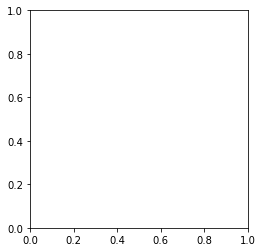

In [16]:
import matplotlib.pyplot as plt
plt.imshow(dataset['val'].__getitem__(1)[0])